In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


%matplotlib inline

In [3]:
train = pd.read_csv('../input/train.csv')

In [4]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test = pd.read_csv('../input/test.csv')

In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## drop unnecessary columns, these columns won't be useful in analysis and prediction


In [9]:

train = train.drop(['Name', 'PassengerId', 'Ticket'], axis=1)

In [10]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [11]:
test = test.drop(['Name', 'PassengerId', 'Ticket'], axis=1)

In [12]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


## Embarked

In [13]:
train.Embarked.fillna('S', inplace=True)

In [14]:
train.Embarked.hasnans

False

# plot

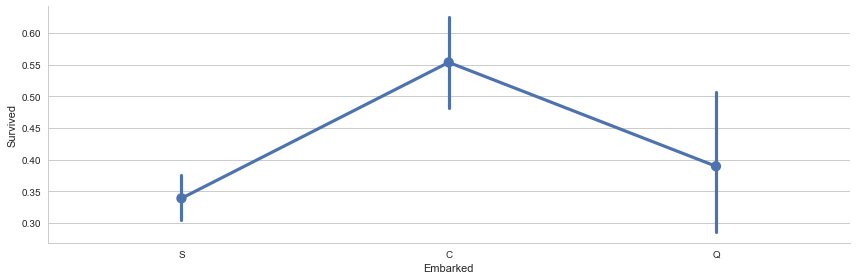

In [28]:
sns.factorplot('Embarked','Survived', data=train,size=4,aspect=3)

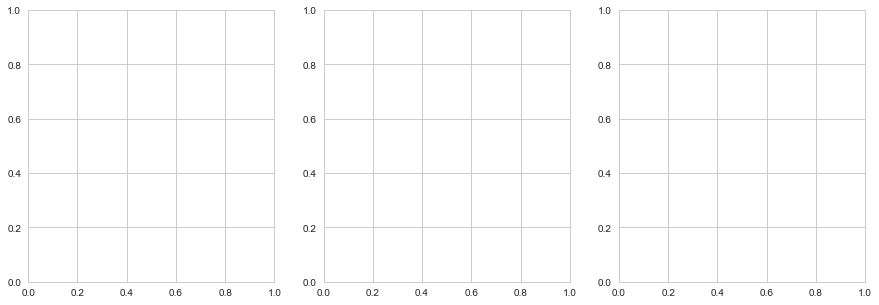

In [29]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))


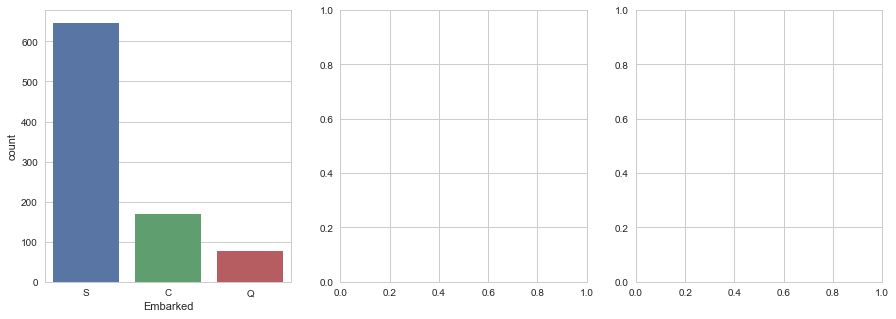

In [30]:
sns.countplot(x='Embarked', data=train, ax=axis1)
fig

In [31]:
sns.countplot(x='Survived', hue="Embarked", data=train, order=[1,0], ax=axis2)


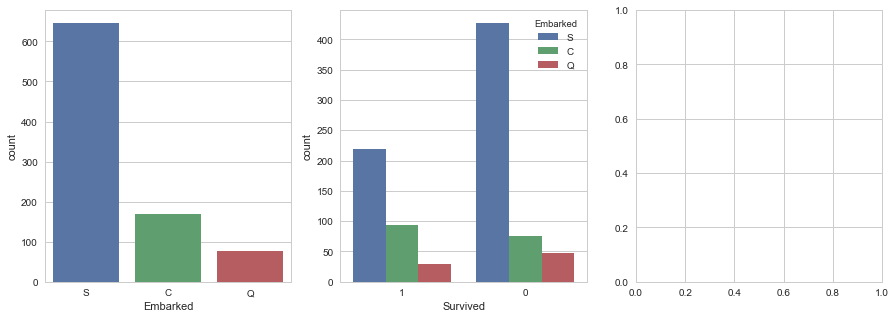

In [32]:
fig

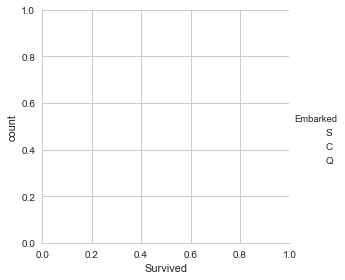

In [20]:
# sns.factorplot('Survived',hue="Embarked",data=train,kind='count',order=[1,0],ax=axis3)


In [33]:
embark_perc = train[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'], ax=axis3)


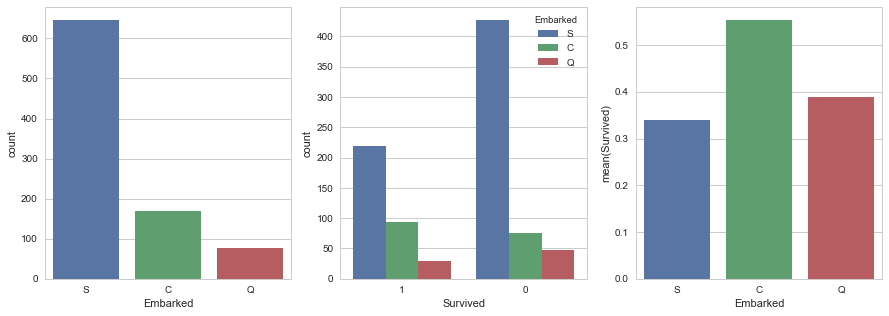

In [34]:
fig

In [35]:
embark_dummies_titanic  = pd.get_dummies(train['Embarked'])


In [37]:
embark_dummies_titanic.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [38]:
titanic_df = train.join(embark_dummies_titanic)


In [39]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,C,Q,S
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,0,1
1,1,1,female,38.0,1,0,71.2833,C85,C,1,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,C123,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,0,1


In [41]:
titanic_df.drop('Embarked', axis=1, inplace=True)

In [42]:
embark_dummies_test = pd.get_dummies(test.Embarked)

In [44]:
test = test.join(embark_dummies_test)

In [46]:
test.drop('Embarked', axis=1, inplace=True)

In [47]:
test.shape

(418, 10)

In [49]:
titanic_df.shape

(891, 11)

# Fare

In [52]:
titanic_df.Fare.max(), titanic_df.Fare.min()

(512.32920000000001, 0.0)

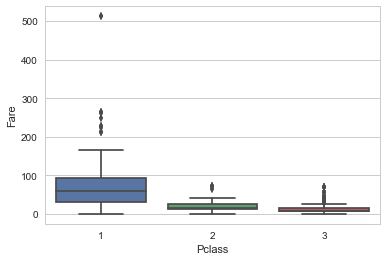

In [59]:
sns.boxplot(x='Pclass', y='Fare', data=titanic_df)

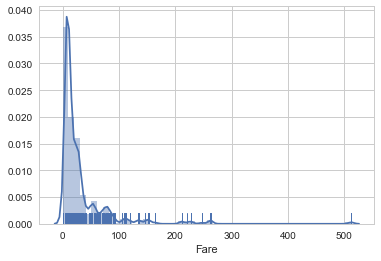

In [71]:
sns.distplot(titanic_df['Fare'], rug=True)

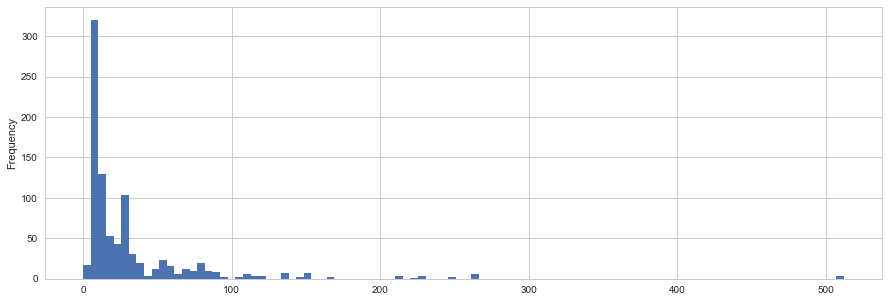

In [66]:
titanic_df.Fare.plot(kind='hist', bins=100, figsize=(15, 5))

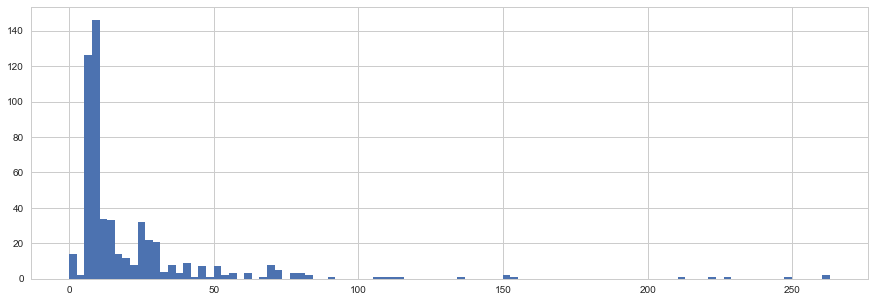

In [68]:
titanic_df.Fare[titanic_df.Survived == 0].hist(bins=100, figsize=(15, 5))

In [74]:
titanic_df[titanic_df.Survived == 1].Fare.mean()

48.39540760233917

In [75]:
titanic_df[titanic_df.Survived == 0].Fare.mean()

22.117886885245877

# Age

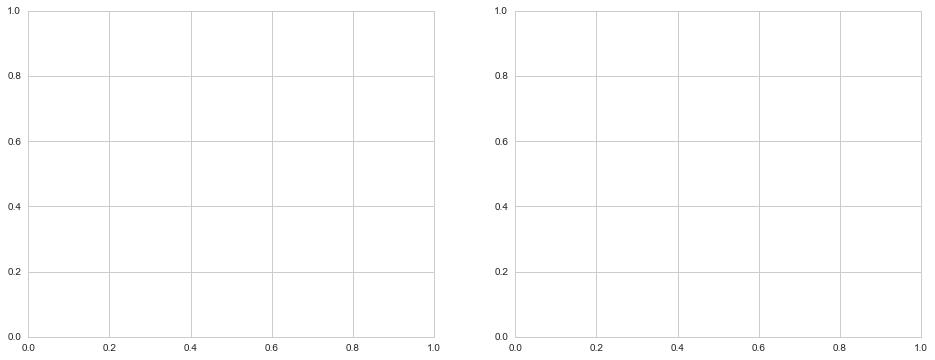

In [93]:
average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()

count_nan_age_titanic = titanic_df["Age"].isnull().sum()


In [94]:
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)


In [104]:
rand_1

array([22, 39, 22, 23, 17, 17, 29, 19, 19, 17, 38, 28, 22, 35, 43, 33, 43,
       27, 30, 20, 40, 30, 25, 30, 29, 24, 42, 32, 20, 25, 26, 16, 22, 42,
       32, 24, 24, 31, 42, 19, 35, 15, 36, 15, 30, 21, 32, 43, 18, 27, 22,
       35, 39, 29, 26, 41, 34, 24, 39, 42, 35, 21, 36, 27, 26, 39, 36, 40,
       16, 22, 25, 22, 30, 18, 23, 32, 19, 24, 25, 22, 28, 22, 32, 21, 17,
       22, 22, 27, 34, 20, 32, 16, 28, 17, 41, 39, 31, 22, 41, 42, 15, 23,
       37, 39, 31, 24, 22, 15, 28, 42, 22, 39, 38, 31, 30, 26, 33, 23, 34,
       35, 33, 18, 29, 38, 40, 26, 29, 22, 31, 41, 32, 39, 22, 34, 26, 34,
       17, 23, 35, 31, 19, 25, 30, 20, 33, 25, 31, 42, 37, 30, 33, 15, 27,
       30, 43, 27, 27, 33, 29, 26, 16, 34, 24, 37, 19, 38, 28, 43, 26, 37,
       24, 27, 42, 31, 19, 42, 40])

In [128]:
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1


/Users/gjwei/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


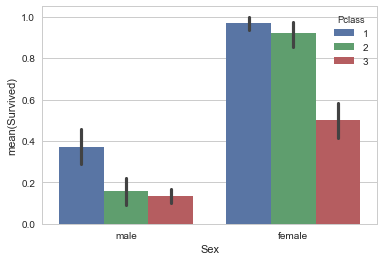

In [152]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=titanic_df)

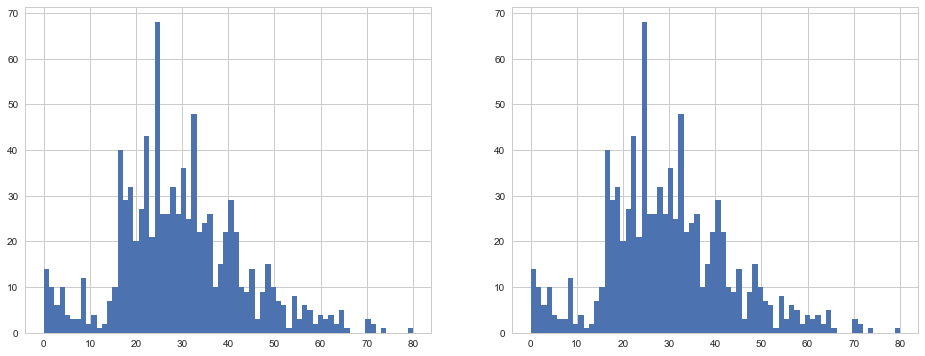

In [130]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize=(16, 6))

titanic_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
titanic_df.Age.astype(int).hist(bins=70, ax=axis2)


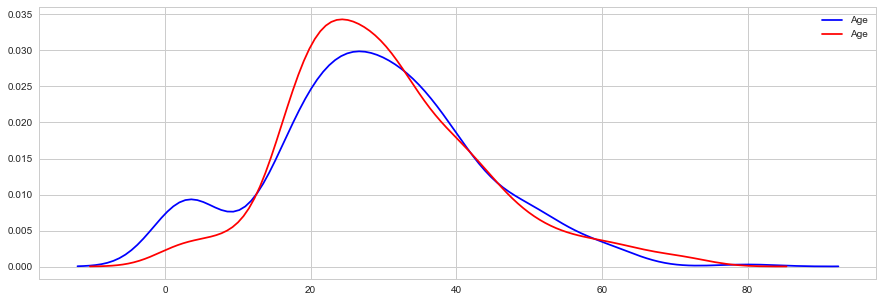

In [141]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
sns.kdeplot(titanic_df[titanic_df['Survived'] == 1]['Age'], color='b', ax=ax)
sns.kdeplot(titanic_df[titanic_df['Survived'] == 0]['Age'], color='r', ax=ax)

# Cabin

In [144]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,C,Q,S
0,0,3,male,22.0,1,0,7.2500,NaN,0,0,1
1,1,1,female,38.0,1,0,71.2833,C85,1,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,0,0,1
3,1,1,female,35.0,1,0,53.1000,C123,0,0,1
4,0,3,male,35.0,0,0,8.0500,NaN,0,0,1


In [156]:
cabin = titanic_df[['Cabin', 'Survived']].groupby('Cabin').mean()

In [160]:
cabin_Survived = cabin['Survived']

In [162]:
cabin_Survived.name = 'cabin_Survived'

In [168]:
titanic_df = titanic_df.join(cabin_Survived, on='Cabin')

In [171]:
titanic_df.cabin_Survived.isnull().sum()

136.0

In [175]:
cabin_s_1 = titanic_df[titanic_df['Pclass'] == 1].cabin_Survived.dropna().mean()

In [186]:
titanic_df[titanic_df['Pclass'] == 1]['cabin_Survived'].fillna(cabin_s_1, inplace=True,)

In [188]:
cabin_s_2 = titanic_df[titanic_df['Pclass'] == 2].cabin_Survived.dropna().mean()

In [189]:
titanic_df[titanic_df['Pclass'] == 2]['cabin_Survived'].fillna(cabin_s_2, inplace=True,)

In [193]:
titanic_df.drop('Cabin', inplace=True, axis=1)

# Family

In [194]:
titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]


In [195]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,cabin_Survived,Family
0,0,3,male,22.0,1,0,7.2500,0,0,1,NaN,1
1,1,1,female,38.0,1,0,71.2833,1,0,0,1.0,1
2,1,3,female,26.0,0,0,7.9250,0,0,1,NaN,0
3,1,1,female,35.0,1,0,53.1000,0,0,1,0.5,1
4,0,3,male,35.0,0,0,8.0500,0,0,1,NaN,0


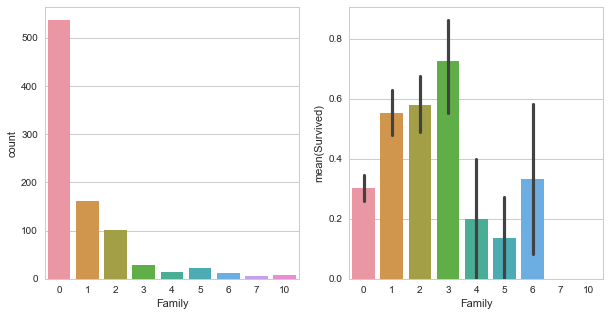

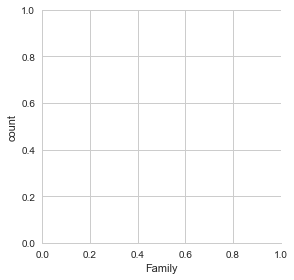

In [202]:
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))
# sns.countplot(x='Family', data=titanic_df, ax=axis1)
sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)

family_perc = titanic_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=titanic_df, ax=axis2)

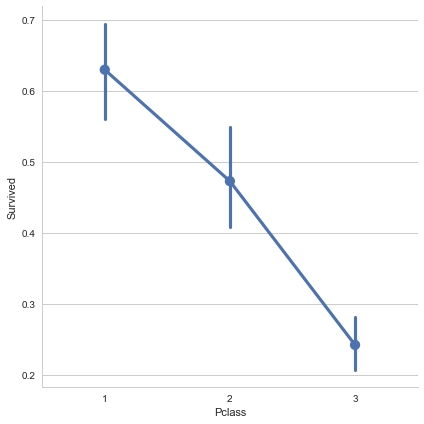

In [205]:
sns.factorplot('Pclass','Survived',order=[1,2,3], data=titanic_df,size=6)

In [210]:
pclasss = pd.get_dummies(titanic_df['Pclass'], prefix='class_')

In [217]:
titanic_df = titanic_df.join(pclasss)

In [218]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,cabin_Survived,Family,class__1,class__2,class__3
0,0,3,male,22.0,1,0,7.2500,0,0,1,NaN,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,1,0,0,1.0,1,1,0,0
2,1,3,female,26.0,0,0,7.9250,0,0,1,NaN,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,0,0,1,0.5,1,1,0,0
4,0,3,male,35.0,0,0,8.0500,0,0,1,NaN,0,0,0,1
